In [1]:
# basic modeling
import os
import torch
#import torchvision
import torch.nn as nn
import numpy as np

# progress bar
from tqdm import tqdm

# for reading and displaying images and editing
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline

# validation & test set
from sklearn.model_selection import train_test_split

# Loss Function & Optimizer
import torch.nn.functional as F
import torch.optim as optim

#Accuracy
from sklearn.metrics import accuracy_score

# Data Cleaning
#from torchvision.transforms import ToTensor
from torch.autograd import Variable # requires_gradient = true
from torch.nn import Linear, ReLU, Sequential, Conv2d, MaxPool2d, Module
from torch.nn import Softmax, BatchNorm2d, Dropout

In [2]:
# Directory where data is
#laptop
#data_dir = r'C:\Users\dsk02\Desktop\python_projects\torch_dogs\main_images\Images'

#gpu comp
data_dir = r'C:\Users\Dylan\Desktop\GPU_RUN\StanfordDogsCNN\images\Images'
print(os.listdir(data_dir))

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [3]:
# clean up classes name
temp = os.listdir(data_dir)

classes = []

# class cleaning

for each_folder in tqdm(temp):
    
    # split words on -
    split_words = each_folder.split('-')
    
    # if there is more than one dash
    if len(split_words) > 2:
        
        # create temp word
        temp = ''
        # for each value in the split_words array (starting from 1)
        for i in range(1,len(split_words)):
            
            # if it's not the end add word + space
            if i != (len(split_words)-1):
                temp += (split_words[i] + ' ')
            else:
                # if end just add the word
                temp += (split_words[i])
        
        # append temp to classes
        classes.append(temp.lower())
    
    # if it equals 2 it's just nasty title + name, append name
    elif len(split_words) == 2:
        classes.append(each_folder.split('-')[1].lower())
    
    # outliers append 
    else:
        classes.append(each_folder.lower())
    
# print first few classes, all lower case
print(classes[0:15])

100%|███████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<?, ?it/s]


['chihuahua', 'japanese_spaniel', 'maltese_dog', 'pekinese', 'shih tzu', 'blenheim_spaniel', 'papillon', 'toy_terrier', 'rhodesian_ridgeback', 'afghan_hound', 'basset', 'beagle', 'bloodhound', 'bluetick', 'black and tan_coonhound']


In [4]:
from collections import defaultdict

# create lookup dictionary for index -> class
lookup = [x for x in range(0,len(classes))]

# initialize with strings
classLookup = defaultdict(str)

# index and class, push into defaultDict ->
for i, each_class in enumerate(classes):
    classLookup[i] = each_class
    
# will use at end for lookups on guesses
print(classLookup)

defaultdict(<class 'str'>, {0: 'chihuahua', 1: 'japanese_spaniel', 2: 'maltese_dog', 3: 'pekinese', 4: 'shih tzu', 5: 'blenheim_spaniel', 6: 'papillon', 7: 'toy_terrier', 8: 'rhodesian_ridgeback', 9: 'afghan_hound', 10: 'basset', 11: 'beagle', 12: 'bloodhound', 13: 'bluetick', 14: 'black and tan_coonhound', 15: 'walker_hound', 16: 'english_foxhound', 17: 'redbone', 18: 'borzoi', 19: 'irish_wolfhound', 20: 'italian_greyhound', 21: 'whippet', 22: 'ibizan_hound', 23: 'norwegian_elkhound', 24: 'otterhound', 25: 'saluki', 26: 'scottish_deerhound', 27: 'weimaraner', 28: 'staffordshire_bullterrier', 29: 'american_staffordshire_terrier', 30: 'bedlington_terrier', 31: 'border_terrier', 32: 'kerry_blue_terrier', 33: 'irish_terrier', 34: 'norfolk_terrier', 35: 'norwich_terrier', 36: 'yorkshire_terrier', 37: 'wire haired_fox_terrier', 38: 'lakeland_terrier', 39: 'sealyham_terrier', 40: 'airedale', 41: 'cairn', 42: 'australian_terrier', 43: 'dandie_dinmont', 44: 'boston_bull', 45: 'miniature_schnau

In [ ]:
# to stop run
xxxxxxxxxx

# load train images
train_img = []
train_targets = []

def load_train(): 

    temp = os.listdir(data_dir)

    # for each folder in the train set
    for i_, each_folder in tqdm(enumerate(temp)):

        print('{} out of {}'.format(i_, len(temp)))

        #current image names
        image_names = os.listdir(data_dir + '/' + str(temp[i_]))

        # for each file in the folder 
        for i, img_name in enumerate(image_names):

            # image path
            image_path = str(str(data_dir) + '/' + str(temp[i_]) + '/' + str(img_name))

            #read image
            img = imread(image_path)

            #change image shape to -> 3,28,28 (originally were massive)
            img = resize(img, (3,28,28))

            # convert dt -> may have to change if 2 big
            img = img.astype('float32')

            #append to trainning list
            train_img.append(img)

            #append to targets list
            train_targets.append(i_)
            
load_train()

In [ ]:
# convert to numpy arrays, make sure worked also
print(len(train_img))
print(len(train_targets))

train_x = np.array(train_img)
train_y = np.array(train_targets)

# pickling / loading (np)

In [ ]:
import pickle

x = train_x
y = train_y
    
# using save (to npy), savez (to npz)
np.save(r'C:\Users\Dylan\Desktop\GPU_RUN/x', x)
np.save(r'C:\Users\Dylan\Desktop\GPU_RUN/y', y)
np.savez(r'C:\Users\Dylan\Desktop\GPU_RUN/db', x=x, y=y)

with open(r'C:\Users\Dylan\Desktop\GPU_RUN/db.pkl', 'wb') as db_file:
    pickle.dump(obj={'x':x, 'y':y}, file=db_file)


# load

In [5]:
## using loading npy, npz files
import pickle

train_x = np.load(r'C:\Users\Dylan\Desktop\GPU_RUN/x.npy')
train_x = np.array(train_x)

train_y = np.load(r'C:\Users\Dylan\Desktop\GPU_RUN/y.npy')
train_y = np.array(train_y)

#db = np.load(r'C:\Users\Dylan\Desktop\GPU_RUN/db.npz')
#with open(path/'db.pkl', 'rb') as db_file:
#    db_pkl = pickle.load(db_file)

# Creating validation set and preprocess the images

In [6]:
train_x, val_x, train_y, val_y = train_test_split(train_x, 
                                                train_y, 
                                                test_size = 0.2,
                                                shuffle=True,
                                                random_state=32)

In [7]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

(16464, 3, 28, 28)
(16464,)
(4116, 3, 28, 28)
(4116,)


In [8]:
train_xT = torch.from_numpy(train_x)
train_yT = torch.from_numpy(train_y)
train_yT = train_yT.long()

print(train_xT.shape, train_yT.shape)

val_xT = torch.from_numpy(val_x)
val_yT = torch.from_numpy(val_y)
val_yT = val_yT.long()

print(val_xT.shape, val_yT.shape)

torch.Size([16464, 3, 28, 28]) torch.Size([16464])
torch.Size([4116, 3, 28, 28]) torch.Size([4116])


In [9]:
import torch.nn as nn
import torch.nn.functional as F

class StanfordDogs(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.cnn_layers = Sequential(
            Conv2d(3,32, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(32),
            ReLU(inplace=True),
            
            Conv2d(32,64, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(64),
            ReLU(inplace=True),
            MaxPool2d(2, 2), # 64 x 14 x 14
            
            Conv2d(64,128, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(128),
            ReLU(inplace=True),
            MaxPool2d(2, 2), # 128 x 7 x 7
            
        )
        
        self.linear_layers = Sequential(
            Linear(128 * 7 * 7, 64 * 14 * 14),
            Linear(64 * 14 * 14, 120))
        
    def forward(self,x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0),-1)
        x = self.linear_layers(x)
        return x


# Build Model / GPU Check

In [10]:
# Initialize Model
model = StanfordDogs()

# optimizer, Adam GOAT
optimizer = optim.Adam(model.parameters(), lr=0.001)

# loss function
criterion = nn.CrossEntropyLoss()

# if gpu -> Cuda
if torch.cuda.is_available():
    
    # push to gpu
    model = model.cuda()
    criterion = criterion.cuda()
    print('GPU is available \n')
else:
    print('GPU is not available \n')
    
print(model)

GPU is available 

StanfordDogs(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=6272, out_features=12544, bias=True)
    (1): Linear(in_features=12544, out_features=120, bias=True)
  )
)


# Trainning Day

In [13]:
loss_Tracker = []
acc_Tracker = []

def train(epoch, x_train, y_train, x_val, y_val):
    
    # memory problems
    torch.cuda.empty_cache()
         
    # it's time to train
    model.train()
    
    # loss
    loss = 0
    
    # check gpu, if so -> send
    if torch.cuda.is_available():
        
        #torch.cuda.empty_cache() 
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        x_val = x_val.cuda()
        y_val = y_val.cuda()
        torch.cuda.empty_cache()
        
    
    #clear gradients of model params
    optimizer.zero_grad()
    
    #preds
    train_preds = model(x_train)
    val_preds = model(x_val)
    
    # loss
    train_loss = criterion(train_preds, y_train)
    loss_val = criterion(val_preds, y_val)
    
    # keep track of val set loss, want to graph
    loss_Tracker.append(loss_val.item())
    
    # update weights
    train_loss.backward()
    optimizer.step()
    
    # extract float
    loss = loss_val.item()
    
    print('Epoch : {}, Loss {}.'.format(epoch+1,loss_val))

In [16]:
# Running
    
# get trainning set
x_train, y_train = Variable(train_xT), Variable(train_yT) # req_grad = Tru
x_val, y_val = Variable(val_xT), Variable(val_yT)

# number of epochs
epochs = 50

# split up the dataset based on epoch
train_n = len(x_train) // epochs # floor division to not overload
val_n = len(x_val) // epochs

for epoch in tqdm(range(0,epochs)):
    
    print(train_n)
    print(val_n)
    
    # send a portion
    xt_send = x_train[train_n * epoch : train_n * (epoch + 1)]
    yt_send = y_train[train_n * epoch : train_n * (epoch + 1)]
    
    xv_send = x_val[val_n * epoch : val_n * (epoch + 1)]
    yv_send = y_val[val_n * epoch : val_n * (epoch + 1)]
    
    # call trainnign and send arrays 
    train(epoch,xt_send,yt_send, xv_send, yv_send)

  0%|                                                                                  | 0/50 [00:00<?, ?it/s]

329
82
Epoch : 1, Loss 6.175567150115967.


  2%|█▍                                                                        | 1/50 [00:00<00:10,  4.72it/s]

329
82
Epoch : 2, Loss 5.997797012329102.


  4%|██▉                                                                       | 2/50 [00:00<00:10,  4.76it/s]

329
82
Epoch : 3, Loss 5.158174991607666.


  6%|████▍                                                                     | 3/50 [00:00<00:09,  4.79it/s]

329
82
Epoch : 4, Loss 5.952808380126953.


  8%|█████▉                                                                    | 4/50 [00:00<00:09,  4.85it/s]

329
82
Epoch : 5, Loss 5.780426025390625.


 10%|███████▍                                                                  | 5/50 [00:01<00:09,  4.87it/s]

329
82
Epoch : 6, Loss 5.6646833419799805.


 12%|████████▉                                                                 | 6/50 [00:01<00:09,  4.86it/s]

329
82
Epoch : 7, Loss 5.825862407684326.


 14%|██████████▎                                                               | 7/50 [00:01<00:08,  4.87it/s]

329
82
Epoch : 8, Loss 5.517221450805664.


 16%|███████████▊                                                              | 8/50 [00:01<00:08,  4.88it/s]

329
82
Epoch : 9, Loss 5.308816909790039.


 18%|█████████████▎                                                            | 9/50 [00:01<00:08,  4.87it/s]

329
82
Epoch : 10, Loss 5.362155914306641.


 20%|██████████████▌                                                          | 10/50 [00:02<00:08,  4.86it/s]

329
82
Epoch : 11, Loss 5.065948963165283.


 22%|████████████████                                                         | 11/50 [00:02<00:08,  4.86it/s]

329
82
Epoch : 12, Loss 5.215670108795166.


 24%|█████████████████▌                                                       | 12/50 [00:02<00:07,  4.86it/s]

329
82
Epoch : 13, Loss 5.176259517669678.


 26%|██████████████████▉                                                      | 13/50 [00:02<00:07,  4.87it/s]

329
82
Epoch : 14, Loss 6.118523120880127.


 28%|████████████████████▍                                                    | 14/50 [00:02<00:07,  4.87it/s]

329
82
Epoch : 15, Loss 5.314820289611816.


 30%|█████████████████████▉                                                   | 15/50 [00:03<00:07,  4.87it/s]

329
82
Epoch : 16, Loss 5.056272029876709.


 32%|███████████████████████▎                                                 | 16/50 [00:03<00:07,  4.84it/s]

329
82
Epoch : 17, Loss 5.310978412628174.


 34%|████████████████████████▊                                                | 17/50 [00:03<00:06,  4.85it/s]

329
82
Epoch : 18, Loss 6.17594575881958.


 36%|██████████████████████████▎                                              | 18/50 [00:03<00:06,  4.86it/s]

329
82
Epoch : 19, Loss 5.508077621459961.


 38%|███████████████████████████▋                                             | 19/50 [00:03<00:06,  4.88it/s]

329
82
Epoch : 20, Loss 5.616249084472656.


 40%|█████████████████████████████▏                                           | 20/50 [00:04<00:06,  4.89it/s]

329
82
Epoch : 21, Loss 6.1768646240234375.


 42%|██████████████████████████████▋                                          | 21/50 [00:04<00:05,  4.91it/s]

329
82
Epoch : 22, Loss 7.0179057121276855.


 44%|████████████████████████████████                                         | 22/50 [00:04<00:05,  4.92it/s]

329
82
Epoch : 23, Loss 5.178272724151611.


 46%|█████████████████████████████████▌                                       | 23/50 [00:04<00:05,  4.92it/s]

329
82
Epoch : 24, Loss 5.502699851989746.


 48%|███████████████████████████████████                                      | 24/50 [00:04<00:05,  4.92it/s]

329
82
Epoch : 25, Loss 5.434094429016113.


 50%|████████████████████████████████████▌                                    | 25/50 [00:05<00:05,  4.92it/s]

329
82
Epoch : 26, Loss 5.366479396820068.


 52%|█████████████████████████████████████▉                                   | 26/50 [00:05<00:04,  4.94it/s]

329
82
Epoch : 27, Loss 5.719364166259766.


 54%|███████████████████████████████████████▍                                 | 27/50 [00:05<00:04,  4.94it/s]

329
82
Epoch : 28, Loss 4.874917507171631.


 56%|████████████████████████████████████████▉                                | 28/50 [00:05<00:04,  4.93it/s]

329
82
Epoch : 29, Loss 5.577885150909424.


 58%|██████████████████████████████████████████▎                              | 29/50 [00:05<00:04,  4.93it/s]

329
82
Epoch : 30, Loss 5.0654473304748535.


 60%|███████████████████████████████████████████▊                             | 30/50 [00:06<00:04,  4.88it/s]

329
82
Epoch : 31, Loss 5.299556732177734.


 62%|█████████████████████████████████████████████▎                           | 31/50 [00:06<00:03,  4.91it/s]

329
82
Epoch : 32, Loss 5.145315170288086.


 64%|██████████████████████████████████████████████▋                          | 32/50 [00:06<00:03,  4.92it/s]

329
82
Epoch : 33, Loss 5.3902506828308105.


 66%|████████████████████████████████████████████████▏                        | 33/50 [00:06<00:03,  4.93it/s]

329
82
Epoch : 34, Loss 5.1446733474731445.


 68%|█████████████████████████████████████████████████▋                       | 34/50 [00:06<00:03,  4.92it/s]

329
82
Epoch : 35, Loss 5.3022284507751465.


 70%|███████████████████████████████████████████████████                      | 35/50 [00:07<00:03,  4.92it/s]

329
82
Epoch : 36, Loss 5.193376541137695.


 72%|████████████████████████████████████████████████████▌                    | 36/50 [00:07<00:02,  4.92it/s]

329
82
Epoch : 37, Loss 4.906711578369141.


 74%|██████████████████████████████████████████████████████                   | 37/50 [00:07<00:02,  4.93it/s]

329
82
Epoch : 38, Loss 5.142208576202393.


 76%|███████████████████████████████████████████████████████▍                 | 38/50 [00:07<00:02,  4.94it/s]

329
82
Epoch : 39, Loss 5.095953464508057.


 78%|████████████████████████████████████████████████████████▉                | 39/50 [00:07<00:02,  4.93it/s]

329
82
Epoch : 40, Loss 5.126489162445068.


 80%|██████████████████████████████████████████████████████████▍              | 40/50 [00:08<00:02,  4.93it/s]

329
82
Epoch : 41, Loss 5.1435465812683105.


 82%|███████████████████████████████████████████████████████████▊             | 41/50 [00:08<00:01,  4.91it/s]

329
82
Epoch : 42, Loss 5.077940940856934.


 84%|█████████████████████████████████████████████████████████████▎           | 42/50 [00:08<00:01,  4.91it/s]

329
82
Epoch : 43, Loss 5.100135803222656.


 86%|██████████████████████████████████████████████████████████████▊          | 43/50 [00:08<00:01,  4.91it/s]

329
82
Epoch : 44, Loss 5.258908748626709.


 88%|████████████████████████████████████████████████████████████████▏        | 44/50 [00:08<00:01,  4.92it/s]

329
82
Epoch : 45, Loss 5.282383441925049.


 90%|█████████████████████████████████████████████████████████████████▋       | 45/50 [00:09<00:01,  4.91it/s]

329
82
Epoch : 46, Loss 4.824498653411865.


 92%|███████████████████████████████████████████████████████████████████▏     | 46/50 [00:09<00:00,  4.92it/s]

329
82
Epoch : 47, Loss 5.245401382446289.


 94%|████████████████████████████████████████████████████████████████████▌    | 47/50 [00:09<00:00,  4.93it/s]

329
82
Epoch : 48, Loss 5.199704170227051.


 96%|██████████████████████████████████████████████████████████████████████   | 48/50 [00:09<00:00,  4.92it/s]

329
82
Epoch : 49, Loss 5.40802526473999.


 98%|███████████████████████████████████████████████████████████████████████▌ | 49/50 [00:10<00:00,  4.89it/s]

329
82
Epoch : 50, Loss 4.806979656219482.


100%|█████████████████████████████████████████████████████████████████████████| 50/50 [00:10<00:00,  4.90it/s]


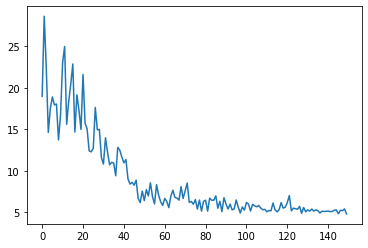

In [17]:
plt.plot(loss_Tracker)